In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [2]:
## Let'S take a dataset

In [3]:
from sklearn.datasets import make_circles
x,y = make_circles(n_samples = 10000, random_state=10)
print(x.shape)

(10000, 2)


In [4]:
y

array([0, 1, 0, ..., 0, 1, 0])

<Axes: >

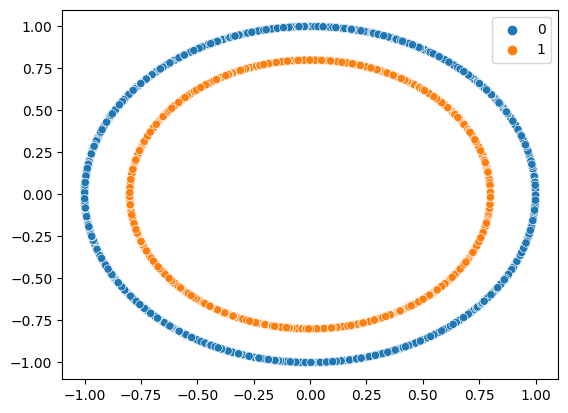

In [5]:
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)

This the clean data , let's add some noise inside this data set

(1000, 2)


<Axes: >

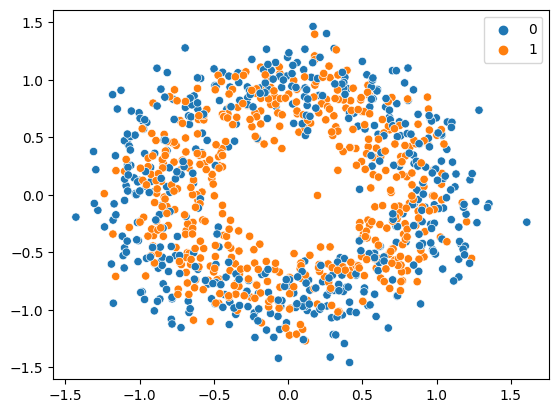

In [6]:
x,y = make_circles(n_samples = 1000,noise = 0.2 ,random_state=10)# here i have added the noise 20%
print(x.shape)
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

In [8]:
print(f"The Shape of x_train : {X_train.shape}")
print(f"The Shape of x_test : {X_test.shape}")
print(f"The Shape of y_train : {y_train.shape}")
print(f"The Shape of y_test : {y_test.shape}")

The Shape of x_train : (800, 2)
The Shape of x_test : (200, 2)
The Shape of y_train : (800,)
The Shape of y_test : (200,)


In [9]:
model=Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
### Let's Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=["accuracy"])

# i am fitting the model
history1 = model.fit(X_train,y_train,validation_data = (X_test,y_test),batch_size=20, epochs = 200)

Epoch 1/200
40/40 [==============================] - 5s 19ms/step - loss: 0.6903 - accuracy: 0.5088 - val_loss: 0.6922 - val_accuracy: 0.4700
Epoch 2/200
40/40 [==============================] - 0s 9ms/step - loss: 0.6862 - accuracy: 0.5113 - val_loss: 0.6940 - val_accuracy: 0.4650
Epoch 3/200
40/40 [==============================] - 0s 9ms/step - loss: 0.6814 - accuracy: 0.5387 - val_loss: 0.6896 - val_accuracy: 0.4850
Epoch 4/200
40/40 [==============================] - 0s 9ms/step - loss: 0.6757 - accuracy: 0.5663 - val_loss: 0.6863 - val_accuracy: 0.5350
Epoch 5/200
40/40 [==============================] - 0s 10ms/step - loss: 0.6669 - accuracy: 0.5938 - val_loss: 0.6798 - val_accuracy: 0.5850
Epoch 6/200
40/40 [==============================] - 0s 9ms/step - loss: 0.6604 - accuracy: 0.6062 - val_loss: 0.6723 - val_accuracy: 0.6050
Epoch 7/200
40/40 [==============================] - 0s 8ms/step - loss: 0.6461 - accuracy: 0.6650 - val_loss: 0.6893 - val_accuracy: 0.5700
Epoch 8/200

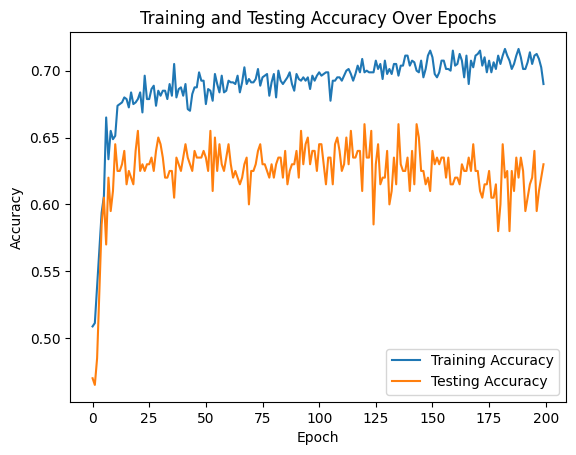

In [11]:
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Testing Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Training and Testing Accuracy Over Epochs')

plt.show()

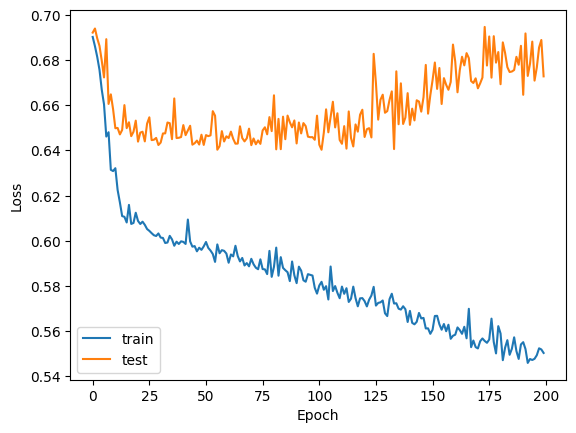

In [12]:
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.show()

## Let's Apply more things

### weight initialization :
We've added the kernel_initializer parameter to the Dense layers to specify the weight initialization technique. Here, we use the 'he_normal' initializer, which is a common choice for ReLU activations.

### BatchNormalization :
We've added BatchNormalization layers after each Dense layer (except for the output layer). Batch normalization helps stabilize and accelerate training by normalizing the activations.

In [13]:
from tensorflow.keras.layers import Dense, BatchNormalization

model1 = Sequential()

# Adding the input layer with weight initialization
model1.add(Dense(20, input_dim=2, activation='relu', kernel_initializer='he_normal'))

# let's Add BatchNormalization layer after the first hidden layer
model1.add(BatchNormalization())

# let's add the rest of the hidden layers with weight initialization and BatchNormalization
model1.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model1.add(BatchNormalization())

model1.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model1.add(BatchNormalization())

model1.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

model1.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model1.add(BatchNormalization())

model1.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model1.add(BatchNormalization())
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
# i am fitting the model
epochs = 200
validation_data = (X_test,y_test)
history2 = model1.fit(X_train,y_train,validation_data = validation_data, epochs = epochs)

Epoch 1/200
25/25 [==============================] - 6s 16ms/step - loss: 0.7701 - accuracy: 0.5625 - val_loss: 0.7150 - val_accuracy: 0.4450
Epoch 2/200
25/25 [==============================] - 0s 7ms/step - loss: 0.7158 - accuracy: 0.5763 - val_loss: 0.7247 - val_accuracy: 0.4450
Epoch 3/200
25/25 [==============================] - 0s 8ms/step - loss: 0.6627 - accuracy: 0.5975 - val_loss: 0.7279 - val_accuracy: 0.4650
Epoch 4/200
25/25 [==============================] - 0s 8ms/step - loss: 0.6747 - accuracy: 0.5962 - val_loss: 0.7208 - val_accuracy: 0.4750
Epoch 5/200
25/25 [==============================] - 0s 8ms/step - loss: 0.6430 - accuracy: 0.6450 - val_loss: 0.7069 - val_accuracy: 0.5200
Epoch 6/200
25/25 [==============================] - 0s 7ms/step - loss: 0.6414 - accuracy: 0.6363 - val_loss: 0.6942 - val_accuracy: 0.5650
Epoch 7/200
25/25 [==============================] - 0s 7ms/step - loss: 0.6358 - accuracy: 0.6438 - val_loss: 0.6886 - val_accuracy: 0.5700
Epoch 8/200


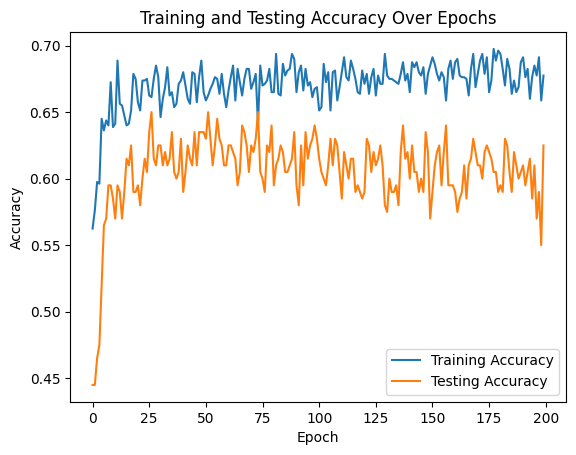

In [15]:
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Testing Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Training and Testing Accuracy Over Epochs')

plt.show()


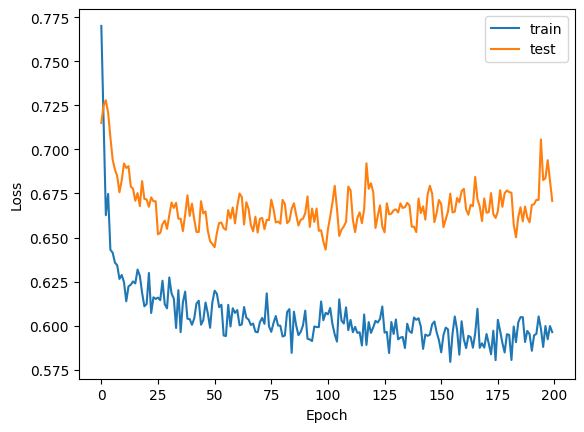

In [16]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.show()

this graph indicate that for some our model is get same train and test on s some of epochs

### Adding the Early Stopping
- **Prevents Overfitting:** Early stopping prevents the model from overfitting the training data by monitoring validation performance and stopping training when it starts to degrade.

- **Saves Training Time:** It saves computational resources and time by stopping training early when further improvements are unlikely.

- **Optimizes Hyperparameters:** Can be used to optimize hyperparameters without training for a fixed number of epochs for each configuration.

- **Avoids Overkill:** Prevents excessive training that may harm model generalization.


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.models import Sequential

# Create model2
model2 = Sequential()

# Adding the input layer with weight initialization
model2.add(Dense(20, input_dim=2, activation='relu', kernel_initializer='he_normal'))

# Add BatchNormalization layer after the first hidden layer
model2.add(BatchNormalization())

# Add the rest of the hidden layers with weight initialization and BatchNormalization
model2.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model2.add(BatchNormalization())

model2.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model2.add(BatchNormalization())

model2.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model2.add(BatchNormalization())

model2.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model2.add(BatchNormalization())

model2.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model2.add(BatchNormalization())

model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


In [20]:
history = model2.fit(X_train, y_train,
                    epochs=200,
                    batch_size=32,
                    validation_data=(X_test,y_test),
                    callbacks=[early_stopping])

Epoch 1/200
25/25 [==============================] - 6s 21ms/step - loss: 0.8331 - accuracy: 0.5475 - val_loss: 0.6954 - val_accuracy: 0.5350
Epoch 2/200
25/25 [==============================] - 0s 8ms/step - loss: 0.7055 - accuracy: 0.5788 - val_loss: 0.7059 - val_accuracy: 0.4750
Epoch 3/200
25/25 [==============================] - 0s 9ms/step - loss: 0.6720 - accuracy: 0.5975 - val_loss: 0.6991 - val_accuracy: 0.5450
Epoch 4/200
25/25 [==============================] - 0s 8ms/step - loss: 0.6448 - accuracy: 0.6250 - val_loss: 0.6957 - val_accuracy: 0.5250
Epoch 5/200
25/25 [==============================] - 0s 8ms/step - loss: 0.6406 - accuracy: 0.6562 - val_loss: 0.6912 - val_accuracy: 0.5900
Epoch 6/200
25/25 [==============================] - 0s 8ms/step - loss: 0.6389 - accuracy: 0.6413 - val_loss: 0.6891 - val_accuracy: 0.5750
Epoch 7/200
25/25 [==============================] - 0s 9ms/step - loss: 0.6343 - accuracy: 0.6450 - val_loss: 0.6877 - val_accuracy: 0.5800
Epoch 8/200


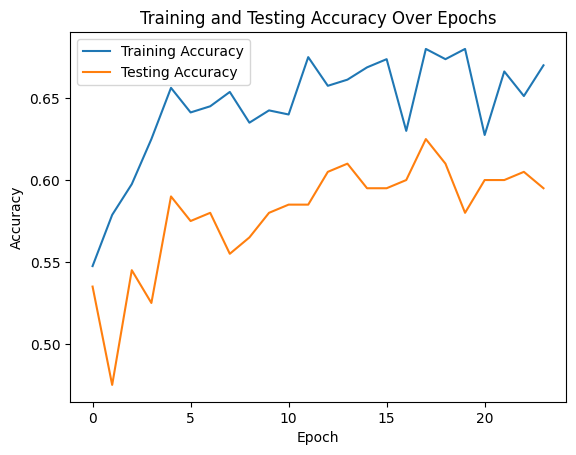

In [21]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Training and Testing Accuracy Over Epochs')

plt.show()


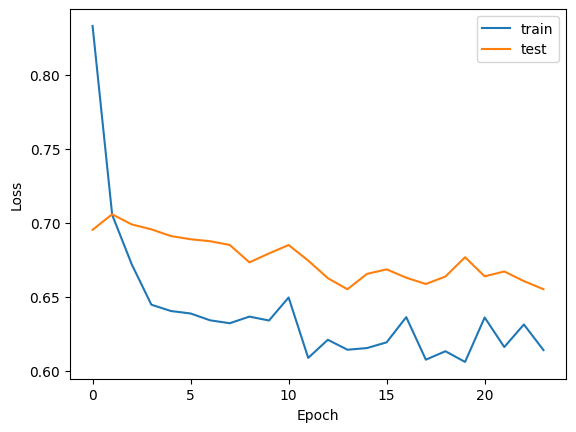

In [22]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.show()

In [23]:
### When i applied the early stopping then our model giving this

In [24]:
del model

### Let's Apply all techniques like weight initialization, BatchNormalization, Dropout for regularization and early stopping

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate the dataset
x, y = make_circles(n_samples=10000, noise=0.2, random_state=10)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create the model
model = Sequential()

# Adding the input layer with weight initialization
model.add(Dense(20, input_dim=2, activation='relu', kernel_initializer='he_normal'))

# Add BatchNormalization layer after the input layer
model.add(BatchNormalization())

# Add the rest of the hidden layers with weight initialization, BatchNormalization, and Dropout for regularization
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Dropout for regularization

model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history3 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300, callbacks=[early_stopping])

# Evaluate the model
_, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/300
250/250 [==============================] - 6s 7ms/step - loss: 0.7637 - accuracy: 0.5664 - val_loss: 0.6144 - val_accuracy: 0.6770
Epoch 2/300
250/250 [==============================] - 1s 6ms/step - loss: 0.6751 - accuracy: 0.6014 - val_loss: 0.5862 - val_accuracy: 0.7060
Epoch 3/300
250/250 [==============================] - 1s 6ms/step - loss: 0.6540 - accuracy: 0.6206 - val_loss: 0.5842 - val_accuracy: 0.7045
Epoch 4/300
250/250 [==============================] - 1s 6ms/step - loss: 0.6439 - accuracy: 0.6386 - val_loss: 0.5834 - val_accuracy: 0.7115
Epoch 5/300
250/250 [==============================] - 1s 6ms/step - loss: 0.6400 - accuracy: 0.6378 - val_loss: 0.5799 - val_accuracy: 0.7095
Epoch 6/300
250/250 [==============================] - 2s 8ms/step - loss: 0.6327 - accuracy: 0.6490 - val_loss: 0.5778 - val_accuracy: 0.7080
Epoch 7/300
250/250 [==============================] - 2s 7ms/step - loss: 0.6285 - accuracy: 0.6486 - val_loss: 0.5803 - val_accuracy: 0.7035

In [26]:
X_test[:10]

array([[ 1.02545692, -0.36714766],
       [ 0.37202401, -0.83945157],
       [ 0.12525817,  0.91416509],
       [ 0.43663639, -0.63397758],
       [-0.13566892,  1.13522296],
       [-0.85597747,  0.92028147],
       [ 1.17241886, -0.06765513],
       [-0.36008532,  0.46727528],
       [ 0.60835764, -0.43758121],
       [ 0.28381471, -0.82712367]])

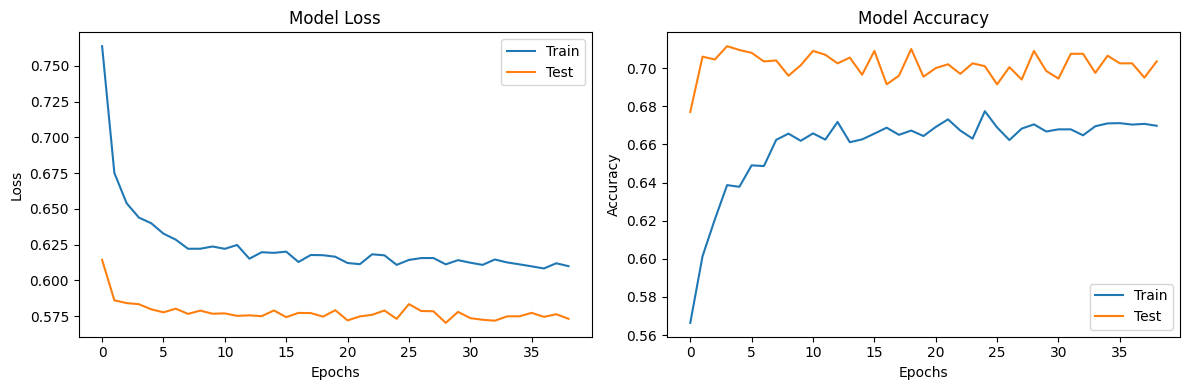

In [31]:
# Ploting training and testing loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'], label='Train')
plt.plot(history3.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Ploting training and testing accuracy
plt.subplot(1, 2, 2)
plt.plot(history3.history['accuracy'], label='Train')
plt.plot(history3.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [32]:
sample_predictions = model.predict(x_test[:10])
sample_predictions_binary = (sample_predictions > 0.5).astype(int)
df = pd.DataFrame({'Actual': y_test[:10], 'Predicted': sample_predictions_binary[:, 0]})

print(df)

1/1 [==============================] - 0s 41ms/step
   Actual  Predicted
0       1          1
1       0          0
2       1          1
3       0          1
4       0          0
5       1          1
6       1          1
7       1          1
8       1          1
9       0          0


#### Thank you for visiting my neural network implementation journey! I hope this notebook provides valuable insights and helps you on your own learning path. Feel free to reach out with any questions or insights. Happy learning!"